## Default Prediction using Keras based UCI credit card data from [Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). 
### Original template from Wilson Kan. 

### Other references:
1. [Deep Credit](https://github.com/natbusa/deepcredit/blob/master/default-prediction.ipynb)

2. [Ranking no. 1 on Kaggle for Predicting Consumer Debt Default]( https://nycdatascience.com/blog/student-works/kaggle-predict-consumer-credit-default/) 

### 1. First load the data and check the basics of the data

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np

pd.set_option('max_columns', 55)
data = pd.read_csv("defaultcreditcard.csv", skiprows = 1)

display(data.dtypes)
display(data.describe())
display(data.shape)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

(30000, 25)

### 2. Transform the categorial variables into binary indicator and scale the variables

In [2]:
# maybe to use pd.get_dummies(dataframe, columns=["categorialvariablename"]).head()
# see http://pbpython.com/categorical-encoding.html

# also see https://github.com/natbusa/deepcredit/blob/master/default-prediction.ipynb for other preprocessing approach

data['MALE'] = np.where(data['SEX']==1, 1, 0)
data['FEMALE'] = np.where(data['SEX']==2, 1, 0)
data['MARRIED'] = np.where(data['MARRIAGE']==1, 1, 0)
data['SINGLE'] = np.where(data['MARRIAGE']==2, 1, 0)
data['STATUS_OTHER'] = np.where(np.logical_or(data['MARRIAGE']==3,data['MARRIAGE']==0), 1, 0)
data['GRADUATE'] = np.where(data['EDUCATION']==1, 1, 0)
data['UNIVERSITY'] = np.where(data['EDUCATION']==2, 1, 0)
data['HIGHSCHOOL'] = np.where(data['EDUCATION']==3, 1, 0)
data['EDU_OTHER'] = np.where(np.logical_or(data['EDUCATION']>=4,data['EDUCATION']==0), 1, 0)

# Normalizing the age as usual with mean and standard deviation
AGEMEAN = data['AGE'].mean()
AGESTD = data['AGE'].std()
data['AGE_NORM'] = data['AGE'].map(lambda x: (x - AGEMEAN) / AGESTD)

# bill and pay amounts are normalized by its 90 percentile.
def my_normalize(s):
    P90 = data[s].quantile(0.90)
    data[s+"_NORM"] = data[s].map(lambda x: max(min(x / P90, 1), 0))
# pay can be 1 to 9 months late. normalize it to between 0 and 1
def pay_normalize(s):
    data[s+"_NORM"] = data[s].map(lambda x: x / 9)

header = list(data.columns.values)
# display(header)

my_normalize(header[1])
for s in header[12:24]:
    my_normalize(s)
for s in header[6:12]:
    pay_normalize(s)


display(data[header[24:]].describe())
display(data[header[24:]].head(5))

default payment next month          MALE        FEMALE       MARRIED  \
count                30000.000000  30000.000000  30000.000000  30000.000000   
mean                     0.221200      0.396267      0.603733      0.455300   
std                      0.415062      0.489129      0.489129      0.498006   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.000000      0.000000      0.000000      0.000000   
50%                      0.000000      0.000000      1.000000      0.000000   
75%                      0.000000      1.000000      1.000000      1.000000   
max                      1.000000      1.000000      1.000000      1.000000   

             SINGLE  STATUS_OTHER      GRADUATE    UNIVERSITY    HIGHSCHOOL  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.532133      0.012567      0.352833      0.467667      0.163900   
std        0.498975      0.111396      0.477859      0.498962      0.370191   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          EDU_OTHER      AGE_NORM  
count  30000.000000  3.000000e+04  
mean       0.015600 -4.414395e-16  
std        0.123924  1.000000e+00  
min        0.000000 -1.571453e+00  
25%        0.000000 -8.120610e-01  
50%        0.000000 -1.611538e-01  
75%        0.000000  5.982379e-01  
max        1.000000  4.720650e+00

default payment next month  MALE  FEMALE  MARRIED  SINGLE  STATUS_OTHER  \
0                           1     0       1        1       0             0   
1                           1     0       1        0       1             0   
2                           0     0       1        0       1             0   
3                           0     0       1        1       0             0   
4                           0     1       0        1       0             0   

   GRADUATE  UNIVERSITY  HIGHSCHOOL  EDU_OTHER  AGE_NORM  
0         0           1           0          0 -1.245999  
1         0           1           0          0 -1.029030  
2         0           1           0          0 -0.161154  
3         0           1           0          0  0.164300  
4         0           1           0          0  2.333990

### 3. Create a training data set with the tranformed variables and split it into 70% training, 30% testing

In [3]:
from sklearn.model_selection import train_test_split

header = list(data.columns.values)
# use only the normalizeddata from column 25 and beyond 
model_data_full = data[header[24:]]

header = list(model_data_full.columns.values)

# X_train, X_test, y_train, y_test = train_test_split(model_data_full[header[1:]], model_data_full[header[0]], test_size=0.3, random_state=2016)
X_train, X_test = train_test_split(model_data_full[header[1:]], test_size=0.3, random_state=2016)
# use a different method "iloc" to extract the sub dataframe so that it remains a n x 1 matrix instead of a series
y_train, y_test = train_test_split(model_data_full.iloc[:,[0]], test_size=0.3, random_state=2016)



In [4]:
# Convert the data type from data frame to numpy array

display(type(X_train))
display(type(y_train))

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

# np.ravel(y_train)
display(type(X_train))
display(type(y_train))
display(type(X_test))
display(type(y_test))

# display(X_train.shape)
# display(y_train.shape)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

numpy.ndarray

numpy.ndarray

numpy.ndarray

numpy.ndarray

## 4. Import Keras using Tensorflow Backend

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

Using TensorFlow backend.


## 5. Set up the Neural Network architecture before training

In [6]:
model = Sequential()
model.add(Dense(64, input_dim=29, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mae', 'mape'])

## 6. Train the model with the training set and validate it on the validation data

In [7]:
history = model.fit(X_train, y_train,
          epochs=20,
          batch_size=128, validation_data = (X_test, y_test))

Train on 21000 samples, validate on 9000 samples
Epoch 1/20
21000/21000 [==============================] - 2s 97us/step - loss: 0.4877 - acc: 0.7857 - val_loss: 0.4735 - val_acc: 0.7903
Epoch 2/20
21000/21000 [==============================] - 1s 25us/step - loss: 0.4577 - acc: 0.8030 - val_loss: 0.4538 - val_acc: 0.8129
Epoch 3/20
21000/21000 [==============================] - 1s 43us/step - loss: 0.4498 - acc: 0.8069 - val_loss: 0.4455 - val_acc: 0.8113
Epoch 4/20
21000/21000 [==============================] - 1s 43us/step - loss: 0.4450 - acc: 0.8102 - val_loss: 0.4535 - val_acc: 0.8174
Epoch 5/20
21000/21000 [==============================] - 1s 38us/step - loss: 0.4422 - acc: 0.8118 - val_loss: 0.4485 - val_acc: 0.8143
Epoch 6/20
21000/21000 [==============================] - 1s 31us/step - loss: 0.4403 - acc: 0.8129 - val_loss: 0.4468 - val_acc: 0.8194
Epoch 7/20
21000/21000 [==============================] - 1s 29us/step - loss: 0.4385 - acc: 0.8150 - val_loss: 0.4514 - val_acc:

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 7. Examine the training and validtion loss / accuracy against with no. of epochs
### Is there overfitting?

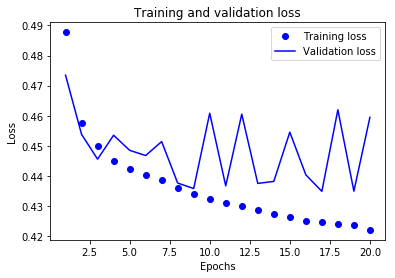

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


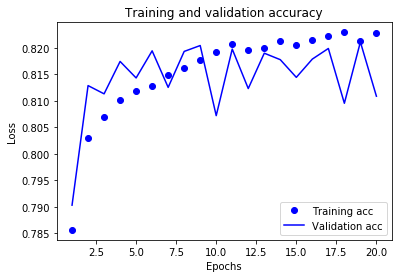

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test log loss:', score[0])
print('Test accuracy:', score[1])

Test log loss: 0.45944479129
Test accuracy: 0.810888888889


## 8. Helper function to plot the confusion matrix and AUC curve

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

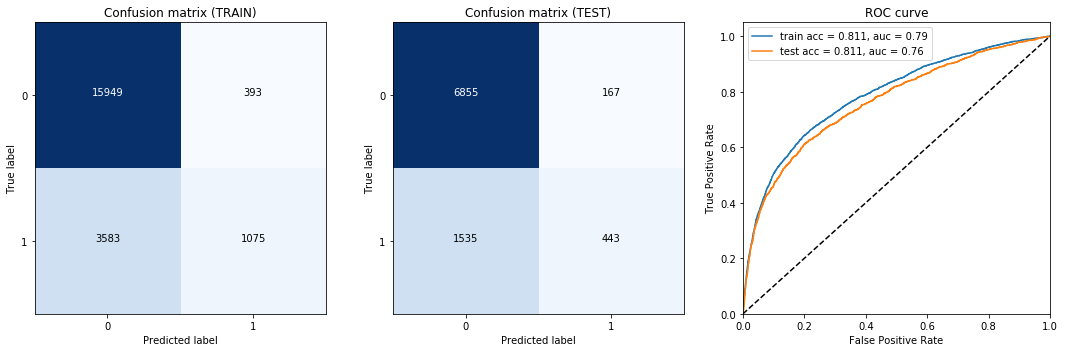

In [26]:
y_train_pred = model.predict_on_batch(X_train)[:,0]
y_test_pred = model.predict_on_batch(X_test)[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_test, y_test_pred, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred)
    
plt.tight_layout()
plt.show()

## 9. Exercise: Try different neural network models: deeper one or wider one